## Spam Emails using Naive Bayes

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv file
spam_df = pd.read_csv('data/emails.csv')
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
#Descriptive Statistics about the dataset
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
#filter out ham emails from the above dataset
ham = spam_df[spam_df['spam'] == 0]
ham.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [5]:
#filter out spam emails from the above dataset
spam = spam_df[spam_df['spam'] == 1]
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
#calculate the ham email percentage
print('Ham Percentage = ', (len(ham)/len(spam_df)), '%')

Ham Percentage =  0.7611731843575419 %


In [7]:
#calculate the spam email percentage
print('Spam Percentage = ', (len(spam)/len(spam_df)), '%')

Spam Percentage =  0.2388268156424581 %


Text(0.5, 1.0, 'Bar Graph')

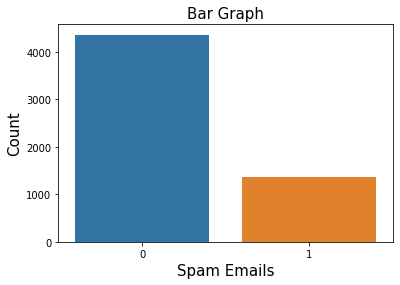

In [8]:
#plot the number of Spam/Ham emails onto the plot
sns.countplot(spam_df['spam'], label = 'Count Spam vs. Ham')
plt.ylabel('Count', fontsize=15)
plt.xlabel('Spam Emails', fontsize=15)
plt.title('Bar Graph', fontsize=15)

In [9]:
#create the count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
spamham_vector = vectorizer.fit_transform(spam_df['text'])

In [10]:
#column names in the above dataset
print(vectorizer.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

In [11]:
print(spamham_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print('Total number of words in all the emails combined: ',spamham_vector.shape[1])

Total number of words in all the emails combined:  37303


In [13]:
print('Total number of emails: ',spamham_vector.shape[0])

Total number of emails:  5728


In [14]:
#fetch dependent variable from the main dataset created at the very beginning
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
#fit the Naive_bayes method for all the emails
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(spamham_vector, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
#create testing dataset
testing_dataset = ['Free Money!!', 'Hi Rajath, Please let me know if you need any further information. Thanks!', 'Iphone Sale', 'I have attached my resume for your reference.']

#transform the tetsing dataset into count vecotizer
testing_dataset_vector = vectorizer.transform(testing_dataset)

#predict the labels for the testing emails
y_pred = classifier.predict(testing_dataset_vector)

#display the result
y_pred

array([1, 0, 1, 0], dtype=int64)

In [17]:
#define X and y for our model
X = spamham_vector
y = label

In [18]:
X.shape

(5728, 37303)

In [19]:
y.shape

(5728,)

In [20]:
#divide the data into trian and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
#fit the Naive Bayes model into traniing dataset
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

array([[3459,   16],
       [   1, 1106]], dtype=int64)

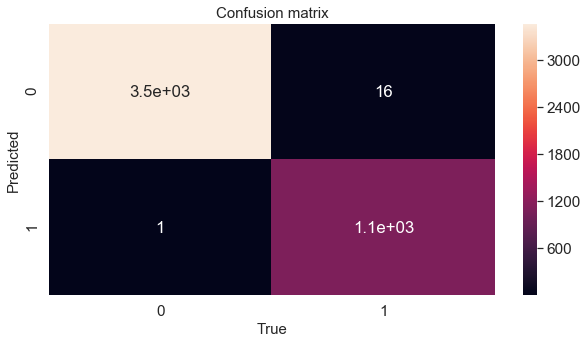

In [22]:
#evaluate the model for training dataset
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_train, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('True', fontsize=15)
plt.title('Confusion matrix', fontsize=15)
cm_train

array([[873,  12],
       [  2, 259]], dtype=int64)

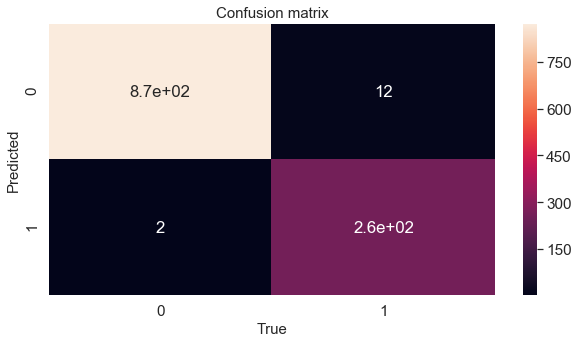

In [23]:
#evaluate the model for testing dataset
y_test_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_test, annot=True)
plt.ylabel('Predicted', fontsize=15)
plt.xlabel('True', fontsize=15)
plt.title('Confusion matrix', fontsize=15)
cm_test

In [24]:
#print the classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       885
           1       0.96      0.99      0.97       261

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146

